<a href="https://colab.research.google.com/github/hyunjyyyy/smdata/blob/main/SM_Data_%EA%B3%B5%EB%AA%A8%EC%A0%84_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- 필요한 엔진 설치 (한 번만) ---
!pip -q install openpyxl xlrd

Using Korean font: NanumGothic -> /usr/share/fonts/truetype/nanum/NanumGothic.ttf


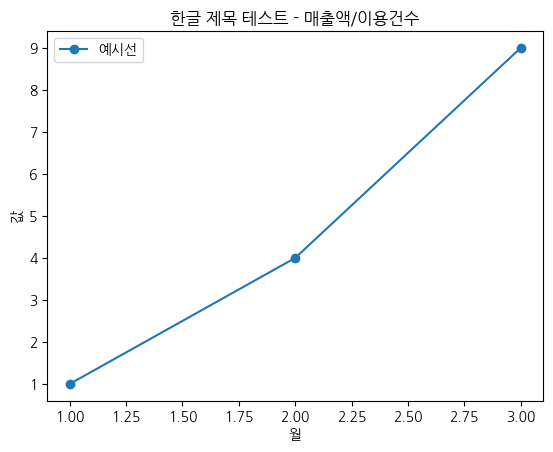

In [ ]:
# ① 폰트 설치 (Nanum + Noto CJK)
!apt-get -y install fonts-nanum fonts-noto-cjk > /dev/null

# ② Matplotlib에 폰트 등록/적용
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 한글 폰트 후보 경로
candidate_paths = [
    "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",
    "/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc",
]

font_path = next((p for p in candidate_paths if os.path.exists(p)), None)
assert font_path, "한글 폰트 경로를 찾지 못했습니다. 설치 단계에서 오류가 없는지 확인하세요."

# 폰트 매니저에 등록 & 캐시 재생성
fm.fontManager.addfont(font_path)
try:
    fm._rebuild()  # 캐시 재생성 (Colab에서 런타임 재시작 없이 바로 적용되도록)
except Exception:
    pass

# 전역 폰트 설정
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rcParams['font.family'] = font_name
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

print("Using Korean font:", font_name, "->", font_path)

# (선택) 간단 검증
plt.figure()
plt.title("한글 제목 테스트 - 매출액/이용건수")
plt.xlabel("월")
plt.ylabel("값")
plt.plot([1,2,3],[1,4,9], marker="o", label="예시선")
plt.legend()
plt.show()

# ✅ 데이터 불러오기 & 기초 EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

def find_files(filenames, search_path="/content/drive/MyDrive"):
  found = {}
  for filename in filenames:
    for root, dirs, files in os.walk(search_path):
      if filename in files:
        found[filename] = os.path.join(root, filename)
  return found

In [ ]:
files_to_load = ["1) 비교과 프로그램 정보.xlsx","2) 비교과 이수자 정보.xlsx"]
file_path = find_files(files_to_load)

for name, path in file_path.items():
  print(f"{name} -> {path}")

1) 비교과 프로그램 정보.xlsx -> /content/drive/MyDrive/1) 비교과 프로그램 정보.xlsx
2) 비교과 이수자 정보.xlsx -> /content/drive/MyDrive/2) 비교과 이수자 정보.xlsx


In [ ]:
import pandas as pd

program_path = file_path['1) 비교과 프로그램 정보.xlsx']
student_path = file_path['2) 비교과 이수자 정보.xlsx']

program_df = pd.read_excel(program_path)
student_df = pd.read_excel(student_path)

print("✅ 파일 로드 완료!")
print(f"프로그램 정보: {program_df.shape}")
print(f"이수자 정보: {student_df.shape}")

✅ 파일 로드 완료!
프로그램 정보: (939, 26)
이수자 정보: (94469, 17)


In [ ]:
# 데이터 미리보기
display(program_df.head())
display(student_df.head())


,프로그램ID,프로그램세부ID,프로그램명,프로그램주제,주관부서(상위),주관부서(하위),시작일,종료일,프로그램 소개,프로그램 태그,...,참여자수,이수자수,핵심역량점수1,핵심역량점수2,핵심역량점수3,핵심역량점수4,핵심역량점수5,핵심역량점수6,핵심역량점수7,핵심역량점수8
0,5335,0,2024년 아시아여성연구원 학술대회: 기후변화와 젠더-도전과 대응,2024년 아시아여성연구원 학술대회: 기후변화와 젠더-도전과 대응,부설연구기관,아시아여성연구원,2024-12-13 13:00:00,2024-12-13 17:00:00,세계보건기구를 비롯하여 유엔과 같은 다양한 국제기구에서는 기후변화에 대한 인간의 생...,"기후변화,기후정의,아시아여성연구원,젠더,젠더불평등,젠더주류화,학술대회",...,5,5,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0
1,4654,4012,[디지털휴머니티센터 x 대웅제약] 웰다 혈당다이어트 4주 프로그램,[3월] 웰체크 다이어트,총장직속기구,디지털휴머니티센터,2024-03-11 17:00:00,2024-04-07 17:00:59,어렵지 않고 오랜 기간 유지 가능한 혈당 다이어트의 과학적인 원리와 방법을 이해하고...,"건강,건강관리전문가,다이어트,대웅제약,장학금,제약회사,취업,취업연계,학생코치,혈당관리",...,123,61,2.5,NaN,NaN,2.5,NaN,NaN,NaN,NaN
2,4872,0,2024-1학기 미래직진 포트폴리오 경진대회,2024-1학기 미래직진 포트폴리오 경진대회,순헌칼리지,순헌칼리지,2024-04-22 10:00:00,2024-06-02 23:59:00,슬기롭고 충실한 대학생활을 위한 나만의 진로설계 수립\n-대학 입학 후 성취하고 싶...,"경진대회,공모,공모전,교양연계,기초교양대학,대학생활,대학생활설계서,미래직진,미래직진...",...,84,84,0.8,0.7,0.5,NaN,NaN,NaN,NaN,NaN
3,5019,0,[재맞고] 2024년 주한미대사관 외교관 방문 특강,[재맞고] 2024년 주한미대사관 외교관 방문 특강,대학일자리플러스센터,대학일자리플러스센터,2024-05-29 14:00:00,2024-05-29 15:00:00,주한미대사관 외교관님께서 지금까지 외교관으로 근무하며 배운 문화간 커뮤니케이션의 중...,"글로벌역량강화,대사관인턴,대학일자리플러스센터,실무자특강,외교관,주한미대사,지원팁,특...",...,55,51,0.5,NaN,NaN,NaN,NaN,NaN,0.5,NaN
4,4926,4296,[재맞고] [선배와의간담회] 2024년 상반기 선배와의 간담회(5월),5/29(수) 19:00~20:30 세인관세법인(세무사) 성단샘 동문(경제학부14),대학일자리플러스센터,대학일자리플러스센터,2024-05-29 19:00:00,2024-05-29 20:30:59,동문선배에게 듣는 취업준비 경험과 현 직무에 대한 정보 공유 \n\n*운영방법: 5...,"KT,LGCNS,경험,기획팀,네이버,선배꿀팁,선배와의간담회,선배특강,세무사,우리은행...",...,73,39,0.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN


,프로그램ID,프로그램세부ID,단과대학명,전공명,학년,이수자ID,만족도평균,이수여부,마일리지,핵심역량점수1,핵심역량점수2,핵심역량점수3,핵심역량점수4,핵심역량점수5,핵심역량점수6,핵심역량점수7,핵심역량점수8
0,4625,0,미술대학,공예과,4,643580-6113024,NaN,이수,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,4744,0,미술대학,공예과,4,643580-6113024,NaN,이수,0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN
2,5001,0,미술대학,공예과,4,643580-6113024,NaN,이수,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,4625,0,생활과학대학,아동복지학부,4,271452-3843598,NaN,이수,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,4744,0,생활과학대학,아동복지학부,4,271452-3843598,NaN,이수,0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN


In [ ]:
# 기본 정보 요약
print("\n[프로그램 정보 요약]")
display(program_df.info())
print("\n[이수자 정보 요약]")
display(student_df.info())


[프로그램 정보 요약]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   프로그램ID    939 non-null    int64         
 1   프로그램세부ID  939 non-null    int64         
 2   프로그램명     939 non-null    object        
 3   프로그램주제    939 non-null    object        
 4   주관부서(상위)  939 non-null    object        
 5   주관부서(하위)  939 non-null    object        
 6   시작일       939 non-null    datetime64[ns]
 7   종료일       939 non-null    datetime64[ns]
 8   프로그램 소개   939 non-null    object        
 9   프로그램 태그   939 non-null    object        
 10  프로그램 구분   918 non-null    object        
 11  프로그램유형1   939 non-null    object        
 12  프로그램유형2   939 non-null    object        
 13  교육방법      939 non-null    object        
 14  프로그램 시간   939 non-null    int64         
 15  마일리지      939 non-null    int64         
 16  참여자수      939 non-null    int64         
 17  이수

None


[이수자 정보 요약]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94469 entries, 0 to 94468
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   프로그램ID    94469 non-null  int64  
 1   프로그램세부ID  94469 non-null  int64  
 2   단과대학명     94469 non-null  object 
 3   전공명       94469 non-null  object 
 4   학년        94469 non-null  int64  
 5   이수자ID     94469 non-null  object 
 6   만족도평균     38761 non-null  float64
 7   이수여부      94469 non-null  object 
 8   마일리지      94469 non-null  int64  
 9   핵심역량점수1   37165 non-null  float64
 10  핵심역량점수2   44144 non-null  float64
 11  핵심역량점수3   9320 non-null   float64
 12  핵심역량점수4   41688 non-null  float64
 13  핵심역량점수5   28268 non-null  float64
 14  핵심역량점수6   5852 non-null   float64
 15  핵심역량점수7   8115 non-null   float64
 16  핵심역량점수8   4386 non-null   float64
dtypes: float64(9), int64(4), object(4)
memory usage: 12.3+ MB


None

In [ ]:
# 컬럼명 확인
print("\n프로그램 컬럼:", list(program_df.columns))
print("이수자 컬럼:", list(student_df.columns))


프로그램 컬럼: ['프로그램ID', '프로그램세부ID', '프로그램명', '프로그램주제', '주관부서(상위)', '주관부서(하위)', '시작일', '종료일', '프로그램 소개', '프로그램 태그', '프로그램 구분', '프로그램유형1', '프로그램유형2', '교육방법', '프로그램 시간', '마일리지', '참여자수', '이수자수', '핵심역량점수1', '핵심역량점수2', '핵심역량점수3', '핵심역량점수4', '핵심역량점수5', '핵심역량점수6', '핵심역량점수7', '핵심역량점수8']
이수자 컬럼: ['프로그램ID', '프로그램세부ID', '단과대학명', '전공명', '학년', '이수자ID', '만족도평균', '이수여부', '마일리지', '핵심역량점수1', '핵심역량점수2', '핵심역량점수3', '핵심역량점수4', '핵심역량점수5', '핵심역량점수6', '핵심역량점수7', '핵심역량점수8']


In [ ]:
# 숫자형
print("📊 [프로그램 정보] describe()")
display(program_df.describe(include='number').T)

print("\n📊 [이수자 정보] describe()")
display(student_df.describe(include='number').T)

📊 [프로그램 정보] describe()


,count,mean,std,min,25%,50%,75%,max
프로그램ID,939.0,5099.268371,239.048738,4617.0,4912.5,5101.00,5315.5000,5488.0
프로그램세부ID,939.0,2424.203408,2143.136345,0.0,0.0,3758.00,4426.5000,4725.0
프로그램 시간,939.0,5.713525,12.879958,0.0,1.0,2.00,5.0000,240.0
마일리지,939.0,2693.823216,3271.513049,0.0,1000.0,2000.00,2000.0000,25000.0
참여자수,939.0,104.204473,620.175218,0.0,14.0,32.00,83.5000,12874.0
이수자수,939.0,64.671991,310.447948,0.0,11.0,22.00,51.0000,5861.0
핵심역량점수1,566.0,2.391820,4.381537,0.0,0.5,1.00,2.4375,60.0
핵심역량점수2,544.0,2.323934,4.059368,0.0,0.6,1.00,2.0000,60.0
핵심역량점수3,225.0,1.890533,3.030855,0.0,0.6,0.60,1.3200,20.0
핵심역량점수4,294.0,2.351429,3.659222,0.0,0.6,1.00,2.2375,31.0



📊 [이수자 정보] describe()


,count,mean,std,min,25%,50%,75%,max
프로그램ID,94469.0,5026.992135,264.833695,4617.0,4744.0,5001.00,5249.00,5488.0
프로그램세부ID,94469.0,1715.121998,2115.217680,0.0,0.0,0.00,4387.00,4725.0
학년,94469.0,2.715473,1.159448,1.0,2.0,3.00,4.00,6.0
만족도평균,38761.0,4.898792,0.367339,1.0,5.0,5.00,5.00,5.0
마일리지,94469.0,810.948565,1921.610735,0.0,0.0,0.00,1000.00,25000.0
핵심역량점수1,37165.0,1.943838,3.451415,0.0,0.5,0.90,2.00,60.0
핵심역량점수2,44144.0,2.016902,3.271549,0.0,0.5,1.00,2.00,60.0
핵심역량점수3,9320.0,2.106179,3.056101,0.0,0.4,0.66,2.25,20.0
핵심역량점수4,41688.0,1.682026,2.138962,0.0,1.0,1.00,2.00,31.0
핵심역량점수5,28268.0,1.671970,2.204059,0.2,1.0,1.00,2.00,50.0


프로그램 정보 숫자형 컬럼: ['프로그램ID', '프로그램세부ID', '프로그램 시간', '마일리지', '참여자수', '이수자수', '핵심역량점수1', '핵심역량점수2', '핵심역량점수3', '핵심역량점수4', '핵심역량점수5', '핵심역량점수6', '핵심역량점수7', '핵심역량점수8']
이수자 정보 숫자형 컬럼: ['프로그램ID', '프로그램세부ID', '학년', '만족도평균', '마일리지', '핵심역량점수1', '핵심역량점수2', '핵심역량점수3', '핵심역량점수4', '핵심역량점수5', '핵심역량점수6', '핵심역량점수7', '핵심역량점수8']


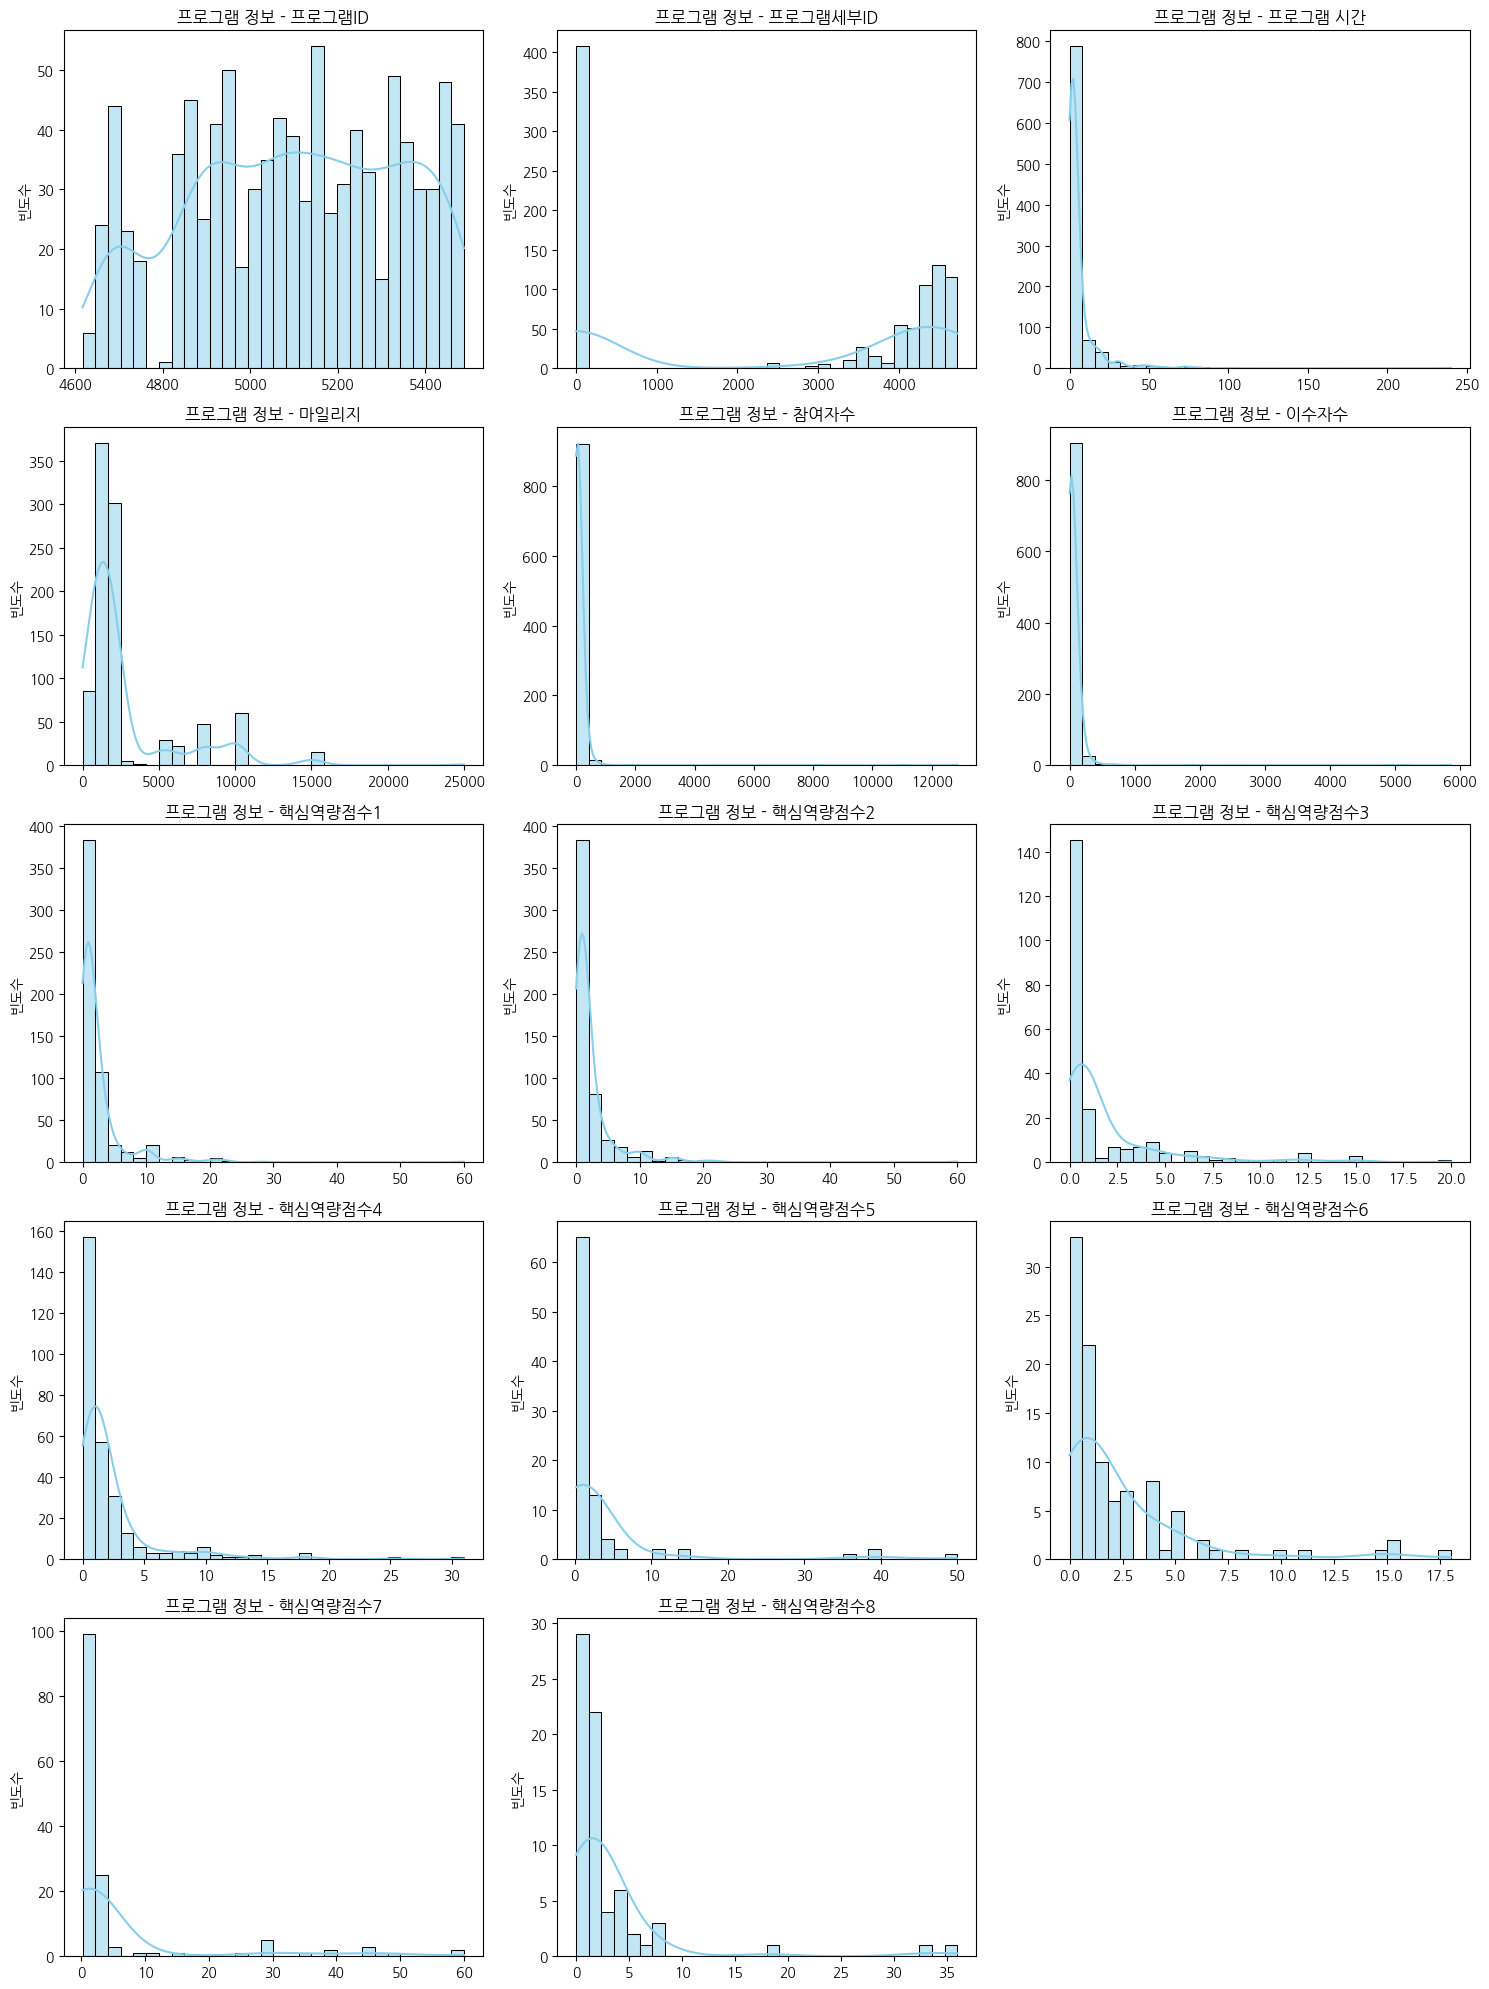

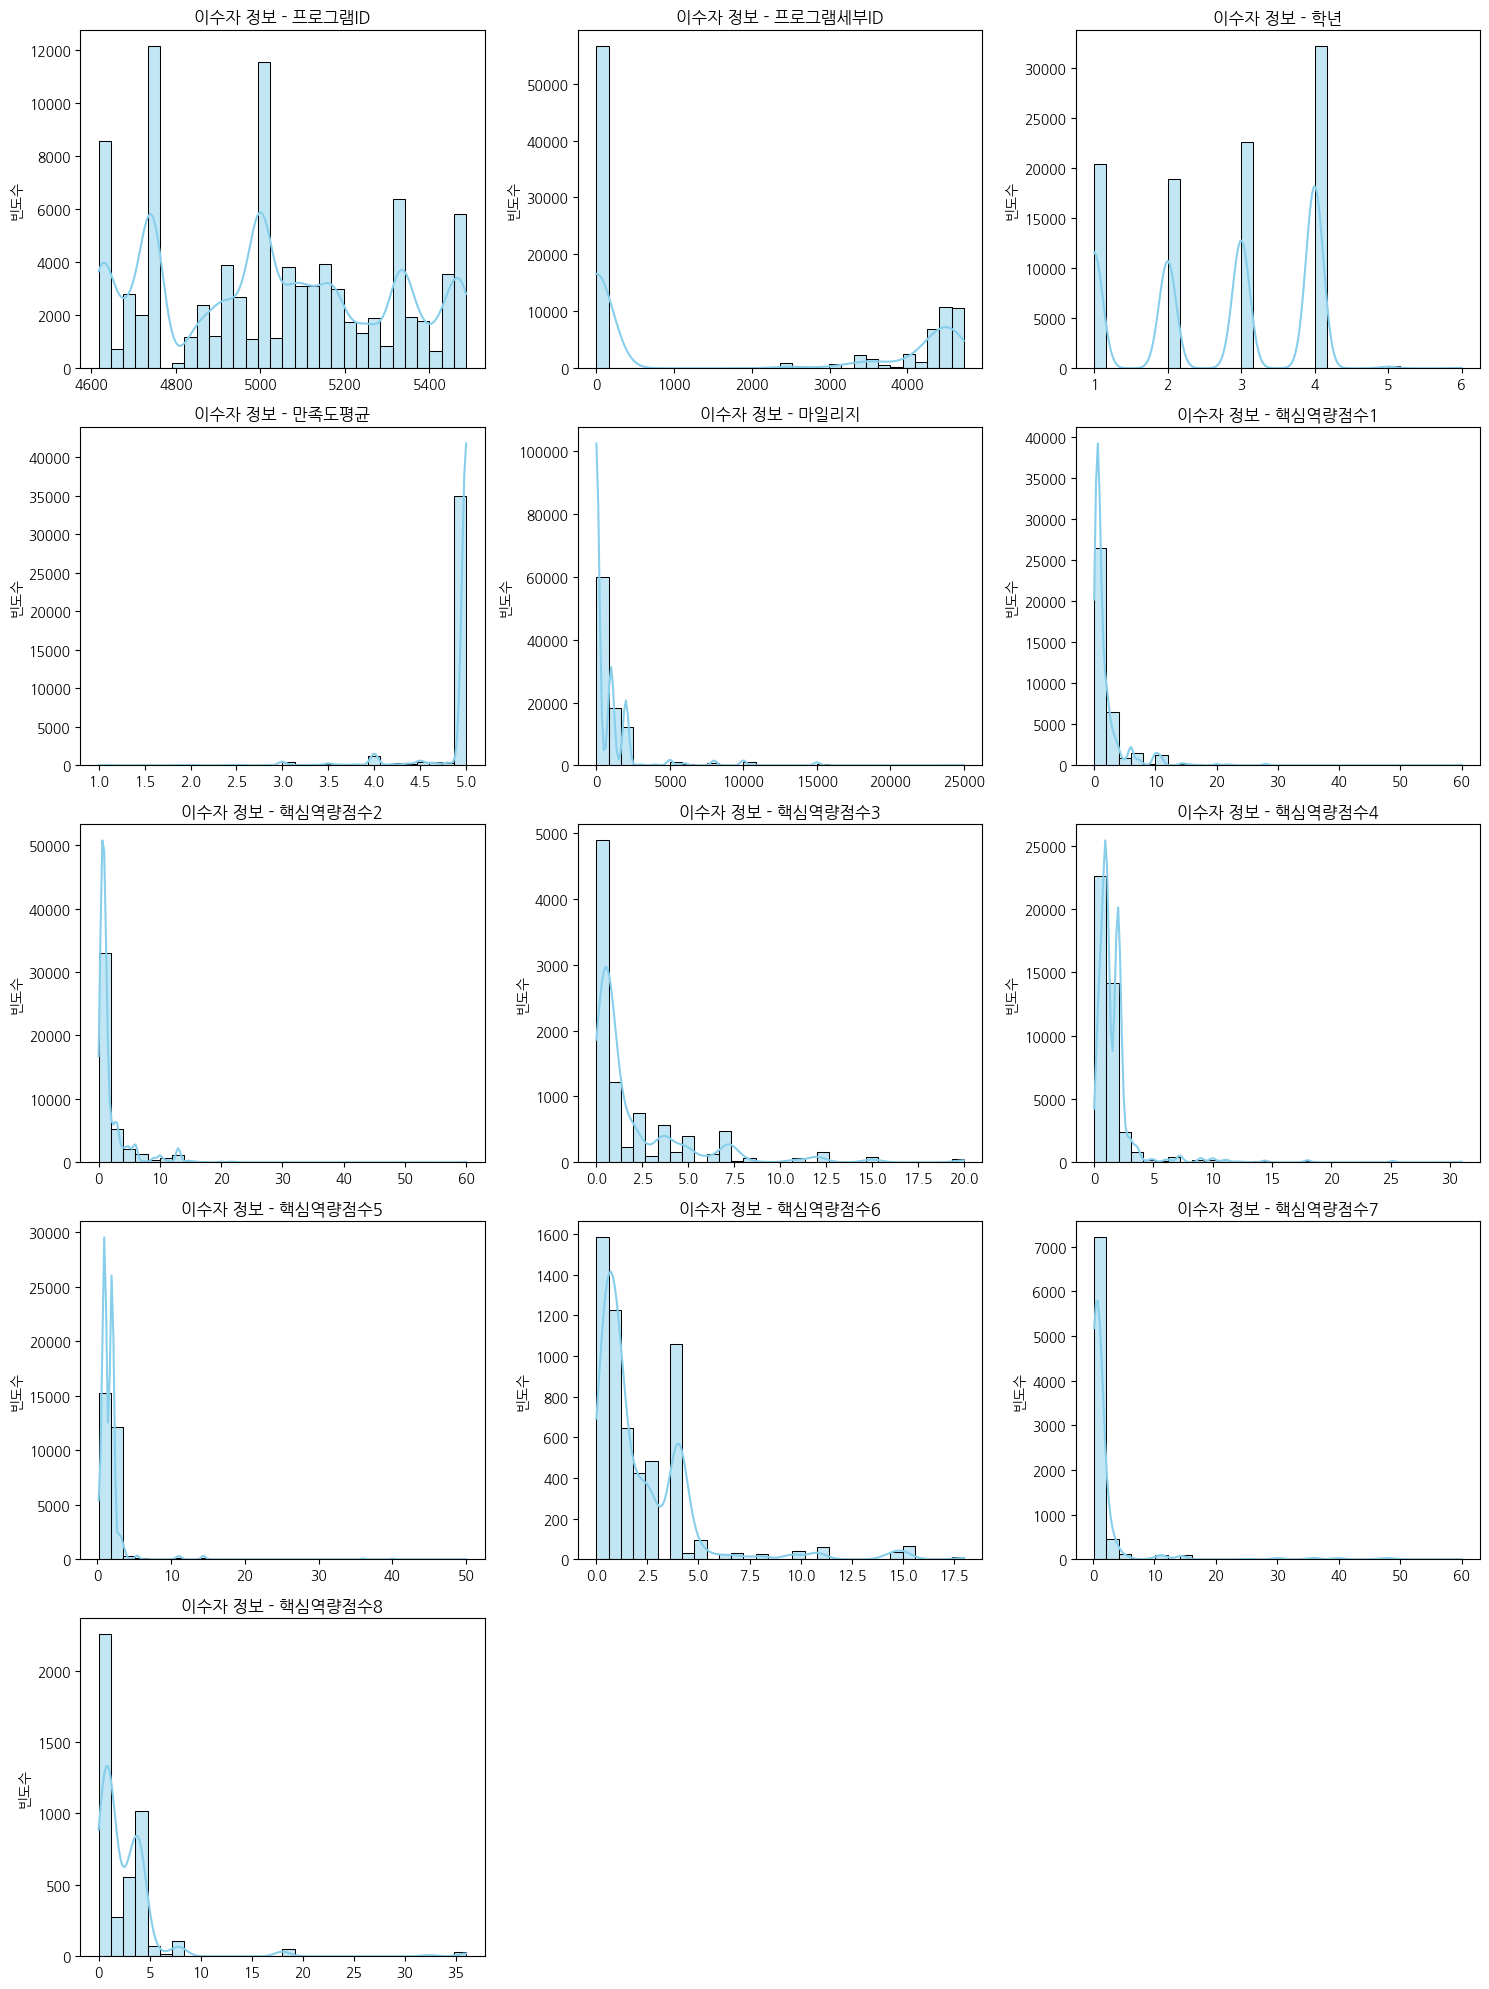

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# === 1️⃣ 숫자형 컬럼 자동 선택 ===
num_cols_program = program_df.select_dtypes(include=['int64','float64']).columns
num_cols_student = student_df.select_dtypes(include=['int64','float64']).columns

print("프로그램 정보 숫자형 컬럼:", list(num_cols_program))
print("이수자 정보 숫자형 컬럼:", list(num_cols_student))

# === 2️⃣ 히스토그램 시각화 ===
def plot_histograms(df, cols, title_prefix, bins=30):
    n = len(cols)
    ncols = 3
    nrows = (n // ncols) + 1

    plt.figure(figsize=(15, nrows * 4))
    for i, col in enumerate(cols):
        plt.subplot(nrows, ncols, i + 1)
        sns.histplot(df[col].dropna(), bins=bins, kde=True, color="skyblue")
        plt.title(f"{title_prefix} - {col}")
        plt.xlabel("")
        plt.ylabel("빈도수")
    plt.tight_layout()
    plt.show()

# === 3️⃣ 실행 ===
plot_histograms(program_df, num_cols_program, "프로그램 정보")
plot_histograms(student_df, num_cols_student, "이수자 정보")


In [ ]:
# 범주형
print("\n🔠 [프로그램 정보] 범주형 요약")
for col in program_df.select_dtypes(include='object').columns:
    print(f"\n▶ {col} - 상위 10개 값:")
    display(program_df[col].value_counts(dropna=False).head(10))

print("\n🔠 [이수자 정보] 범주형 요약")
for col in student_df.select_dtypes(include='object').columns:
    print(f"\n▶ {col} - 상위 10개 값:")
    display(student_df[col].value_counts(dropna=False).head(10))


🔠 [프로그램 정보] 범주형 요약

▶ 프로그램명 - 상위 10개 값:


,count
프로그램명,
2024-2 숙명행복성장주간,21
[도서관] 9월 정기 학술정보이용교육,15
신소재물리전공 산학연 맞춤형 진로 탐색을 위한 Colloquium,12
2024-2학기 교직이수자 및 교육대학원생 대상 예비교원 현장역량강화 프로그램,11
2024-1학기 교직이수자 및 교육대학원생 대상 예비교원 현장역량강화 프로그램,10
[도서관] 2024 신입생 도서관투어,10
2025 새내기를 위한 맞춤형 기초학력강화 워크숍,10
[도서관] 10월 정기 학술정보이용교육,9
[도서관] 11월 정기 학술정보이용교육,9



▶ 프로그램주제 - 상위 10개 값:


,count
프로그램주제,
준비된 전문인 직무심화교육_직무 이해 특강,5
준비된 전문인 직무심화교육_직무 실습 및 피드백,5
웰다 혈당다이어트 프로그램 [디지털휴머니티센터x대웅제약],4
[2단계] 나의 흥미분석을 통한 진로탐색,3
몰입형 콘텐츠 디자인 역량 개발을 위한 과정,3
[아모레퍼시픽] 정태인 멘토(프론트웹개발),3
[1단계] 나의 성격분석을 통한 진로탐색,3
영문이력서 및 커버레터 작성법,3
[4단계] 스펙부자가 되기 위한 대학생활플랜 세우기,3



▶ 주관부서(상위) - 상위 10개 값:


,count
주관부서(상위),
대학일자리플러스센터,268
중앙도서관,99
문과대학,94
교수학습센터,81
학생지원센터,32
국제처,25
교무처,25
미술대학,25
사회과학대학,23



▶ 주관부서(하위) - 상위 10개 값:


,count
주관부서(하위),
대학일자리플러스센터,268
학술정보운영팀,96
교수학습센터,81
학생지원센터,32
교무처,25
유학생서비스팀,24
대학IR센터,23
르꼬르동블루외식경영전공,22
SW중심대학사업단,21



▶ 프로그램 소개 - 상위 10개 값:


,count
프로그램 소개,
"도서관에서 시행하는 정기 학술정보 이용교육입니다.\n학술정보 이용교육을 통해 도서관 소장자료, 구독자료 등의 학술정보를 효과적으로 검색하고 활용하는 방법을 배워보세요.",92
[숙명행복성장주간] 우리 대학 학생들의 행복성장을 위한 다양한 비교과프로그램 (대면/비대면),27
2024학년도 교직이수자 및 교육대학원생 대상 예비교원 현장역량강화를 위한 프로그램으로 10개 주제 각 주제별 3~15시간으로 운영,21
"진로탐색 및 설계를 위한 진로 종합 프로그램으로, 자기이해 -> 직업세계이해 -> 스펙 달성 계획 수립을 통한 진로결정 역량 강화를 목적으로 함",12
대상: 졸업 후 2년 이내 미취업 졸업생\n지원 희망 직무 중심의 직무 이해 특강과 실무 과제 실습,10
"<한국어문학부 진로 탐색 프로그램>은 한국어문학부 학생들이 전공 분야의 진로에 대한 정보를 얻고, 탐색해 볼 수 있는 기회를 제공합니다. 외부에서 활발히 활동하고 있는 동문 선배들 특강과 더불어 전공교수와의 진로 간담회를 분야별로 진행하기에, 학생들이 자신의 적성에 맞는 진로를 탐색해 보고, 해당 분야로 진출하는 데 도움을 주고자 합니다. 이 프로그램을 통해 진출분야에 대한 정보를 미리 확인해 보고, 구체적인 진로를 설계해 볼 수 있을 것입니다.",10
"본 프로그램은 본교 학생의 외국어 능력 향상과 글로벌 역량 강화를 위한 프로그램이다.\n모국어가 외국어인 방문 교환학생 및 유학생이 본교 재학생의 튜터가 되어 온라인 외국어 학습의 기회를 제공함으로써, 재학생의 국제적 역량 중 일부인 외국어 능력 향상을 도모한다.",10
2025학년도 신입생을 대상으로 기초학력강화를 위한 10개 과목을 운영함,10
"아모레퍼시픽 현직자 멘토로 취업 준비, 직무 탐색 및 분석 등 취업 관련 프로그램",9



▶ 프로그램 태그 - 상위 10개 값:


,count
프로그램 태그,
"DBPIA,RefWorks,교보문고,논문작성,도서관,동영상강좌,오디오북,이용교육,이용법,자료작성법,전자책,참고문헌,학술DB,학술논문,학술정보",47
"대면비대면,박람회,병행,설명회,숙명행복성장주간,순헌관광장,스노보드,온라인프로그램,진로,진로주간,학생지원센터,학생진로지도,행복성장주간,행정부서박람회",21
"DBPIA,RefWorks,교보문고,논문작성,도서관,동영상강좌,오디오북,이용교육,이용법,자료검색법,전자책,참고문헌,학술DB,학술논문,학술정보",16
"교사,교원양성센터,교육대학원생,교직실무,교직이수자,기후위기,다문화,디시털시대,미디어리터러시,미래변화,민주시민교육,빅데이터,빅데이터활용,상담지도,연구윤리,예비교원,윤리,인성과적성,청소년문제,통일교육,특강,현장역량강화",11
없음,11
"교사,교원양성센터,교육대학원생,교직실무,교직이수자,기후위기,다문화,디지털리터러시,미디어리터러시,미래변화,민주시민교육,빅데이터,빅데이터활용,상담지도,연구윤리,예비교원,윤리,인성과적성,청소년문제,통일교육,특강,현장역량강화",10
"수학과,수학과콜로키움,콜로키움",10
"도서관투어,스노우버스,스마티어,신입생,이용방법",10
"KT,LGCNS,경험,기획팀,네이버,선배꿀팁,선배와의간담회,선배특강,세무사,우리은행,인사팀,존슨앤존슨,직무,초록우산어린이재단,취업,취업준비,카카오뱅크,현대모비스",9



▶ 프로그램 구분 - 상위 10개 값:


,count
프로그램 구분,
비교과 (비학점),880
전공교과연계 비교과 (학점불인정),29
NaN,21
교양교과연계 비교과 (학점불인정),5
비교과 (학점인정),3
전공교과연계 비교과 (학점인정),1



▶ 프로그램유형1 - 상위 10개 값:


,count
프로그램유형1,
학습,409
취업,304
진로,116
기타,48
학생활동,24
심리,22
창업,16



▶ 프로그램유형2 - 상위 10개 값:


,count
프로그램유형2,
특강/워크숍/캠프,238
워크숍/특강,107
독서,96
산학연계비교과,81
전공별진로취업,81
설명회/박람회,71
CTL학습법 특강,39
공모전/경진대회,25
행정지원,20



▶ 교육방법 - 상위 10개 값:


,count
교육방법,
대면,511
비대면(실시간),129
비대면(녹화),100
대면 비대면 병행(실시간),94
"해당없음(공모전, 콘테스트 등)",43
대면 비대면 병행(녹화),35
비대면(실시간+녹화),27



🔠 [이수자 정보] 범주형 요약

▶ 단과대학명 - 상위 10개 값:


,count
단과대학명,
공과대학,20616
문과대학,17561
경상대학,11831
사회과학대학,8666
이과대학,8257
생활과학대학,5003
법과대학,3882
영어영문학부(대학),3709
미술대학,3519



▶ 전공명 - 상위 10개 값:


,count
전공명,
경영학부,8049
법학부,3882
경제학부,3782
문헌정보학과,3675
화공생명공학부,3593
컴퓨터과학전공,3017
약학부,2855
IT공학전공,2812
영어영문학전공,2709



▶ 이수자ID - 상위 10개 값:


,count
이수자ID,
783665-4230329,231
005144-6425840,171
158052-3085786,167
342913-9781985,146
385314-8529471,144
518376-0210546,141
548617-2631796,140
956631-6415775,134
684071-1519164,131



▶ 이수여부 - 상위 10개 값:


,count
이수여부,
이수,57506
미이수,36963


# ✅ 단변량 탐색

In [ ]:
# 결측치 확인
print("\n[결측치 개수]")
print("프로그램 정보 결측치:\n", program_df.isna().sum().sort_values(ascending=False).head(10))
print("\n이수자 정보 결측치:\n", student_df.isna().sum().sort_values(ascending=False).head(10))

# 결측률
def null_summary(df, name):
    print(f"\n [{name}] 결측치 요약")
    summary = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    display(summary[summary > 0].to_frame("결측률(%)").head(15))

null_summary(program_df, "프로그램 정보")
null_summary(student_df, "이수자 정보")


[결측치 개수]
프로그램 정보 결측치:
 핵심역량점수8    869
핵심역량점수5    847
핵심역량점수6    837
핵심역량점수7    793
핵심역량점수3    714
핵심역량점수4    645
핵심역량점수2    395
핵심역량점수1    373
프로그램 구분     21
프로그램ID       0
dtype: int64

이수자 정보 결측치:
 핵심역량점수8    90083
핵심역량점수6    88617
핵심역량점수7    86354
핵심역량점수3    85149
핵심역량점수5    66201
핵심역량점수1    57304
만족도평균      55708
핵심역량점수4    52781
핵심역량점수2    50325
프로그램ID         0
dtype: int64

 [프로그램 정보] 결측치 요약


,결측률(%)
핵심역량점수8,92.545261
핵심역량점수5,90.202343
핵심역량점수6,89.137380
핵심역량점수7,84.451544
핵심역량점수3,76.038339
핵심역량점수4,68.690096
핵심역량점수2,42.066028
핵심역량점수1,39.723110
프로그램 구분,2.236422



 [이수자 정보] 결측치 요약


,결측률(%)
핵심역량점수8,95.357207
핵심역량점수6,93.805375
핵심역량점수7,91.409880
핵심역량점수3,90.134330
핵심역량점수5,70.076956
핵심역량점수1,60.659052
만족도평균,58.969609
핵심역량점수4,55.871238
핵심역량점수2,53.271444


In [ ]:
# 중복 데이터
print(f"\n📋 프로그램 정보 중복행 개수: {program_df.duplicated().sum()}")
print(f"📋 이수자 정보 중복행 개수: {student_df.duplicated().sum()}")


📋 프로그램 정보 중복행 개수: 0
📋 이수자 정보 중복행 개수: 0



📊 [프로그램 정보] 수치형 변수 요약 (1%, 50%, 99%)


,count,mean,min,1%,50%,99%,max,std
프로그램ID,939.0,5099.268371,4617.0,4663.38,5101.0,5482.0,5488.0,239.048738
프로그램세부ID,939.0,2424.203408,0.0,0.0,3758.0,4713.62,4725.0,2143.136345
시작일,939,2024-08-13 03:48:16.166134272,2024-03-01 00:00:00,2024-03-04 09:00:00,2024-09-02 00:00:00,2025-02-17 10:00:00,2025-03-10 00:00:00,NaN
종료일,939,2024-08-30 17:13:27.931842560,2024-03-06 11:00:59,2024-03-12 01:59:10.420000,2024-09-06 17:00:59,2025-03-10 00:00:59,2025-04-09 00:00:59,NaN
프로그램 시간,939.0,5.713525,0.0,1.0,2.0,58.48,240.0,12.879958
마일리지,939.0,2693.823216,0.0,0.0,2000.0,15000.0,25000.0,3271.513049
참여자수,939.0,104.204473,0.0,0.0,32.0,593.54,12874.0,620.175218
이수자수,939.0,64.671991,0.0,0.0,22.0,414.28,5861.0,310.447948
핵심역량점수1,566.0,2.39182,0.0,0.13,1.0,20.56,60.0,4.381537
핵심역량점수2,544.0,2.323934,0.0,0.25,1.0,16.57,60.0,4.059368



📊 [이수자 정보] 수치형 변수 요약 (1%, 50%, 99%)


,count,mean,std,min,1%,50%,99%,max
프로그램ID,94469.0,5026.992135,264.833695,4617.0,4625.00,5001.00,5483.0,5488.0
프로그램세부ID,94469.0,1715.121998,2115.217680,0.0,0.00,0.00,4717.0,4725.0
학년,94469.0,2.715473,1.159448,1.0,1.00,3.00,4.0,6.0
만족도평균,38761.0,4.898792,0.367339,1.0,3.00,5.00,5.0,5.0
마일리지,94469.0,810.948565,1921.610735,0.0,0.00,0.00,10000.0,25000.0
핵심역량점수1,37165.0,1.943838,3.451415,0.0,0.20,0.90,15.0,60.0
핵심역량점수2,44144.0,2.016902,3.271549,0.0,0.30,1.00,13.0,60.0
핵심역량점수3,9320.0,2.106179,3.056101,0.0,0.20,0.66,15.0,20.0
핵심역량점수4,41688.0,1.682026,2.138962,0.0,0.20,1.00,11.2,31.0
핵심역량점수5,28268.0,1.671970,2.204059,0.2,0.20,1.00,11.2,50.0



📦 [프로그램 정보] 이상치 확인 (Boxplot)


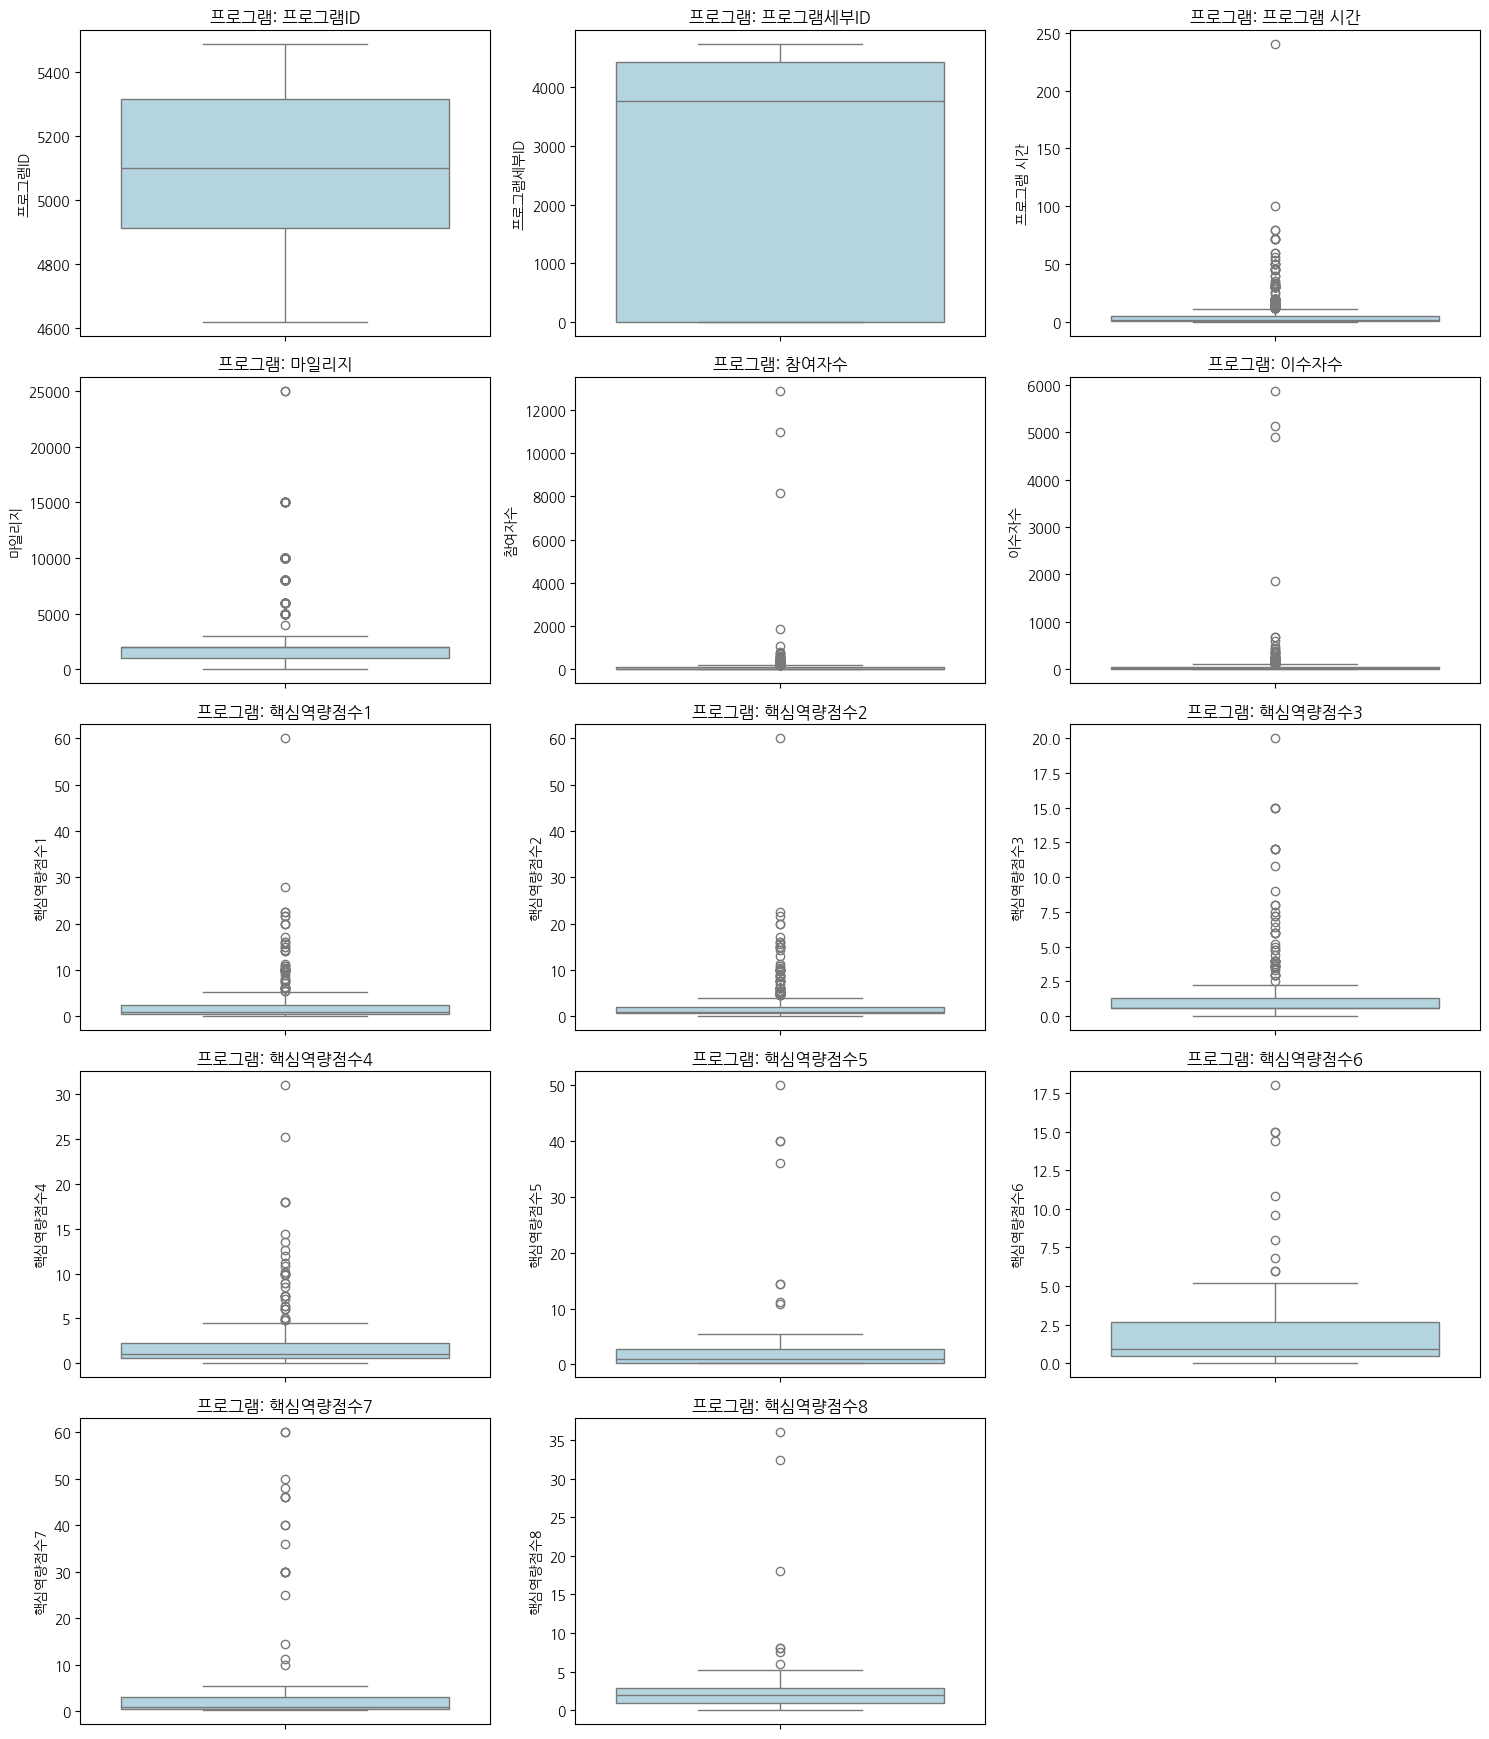


📦 [이수자 정보] 이상치 확인 (Boxplot)


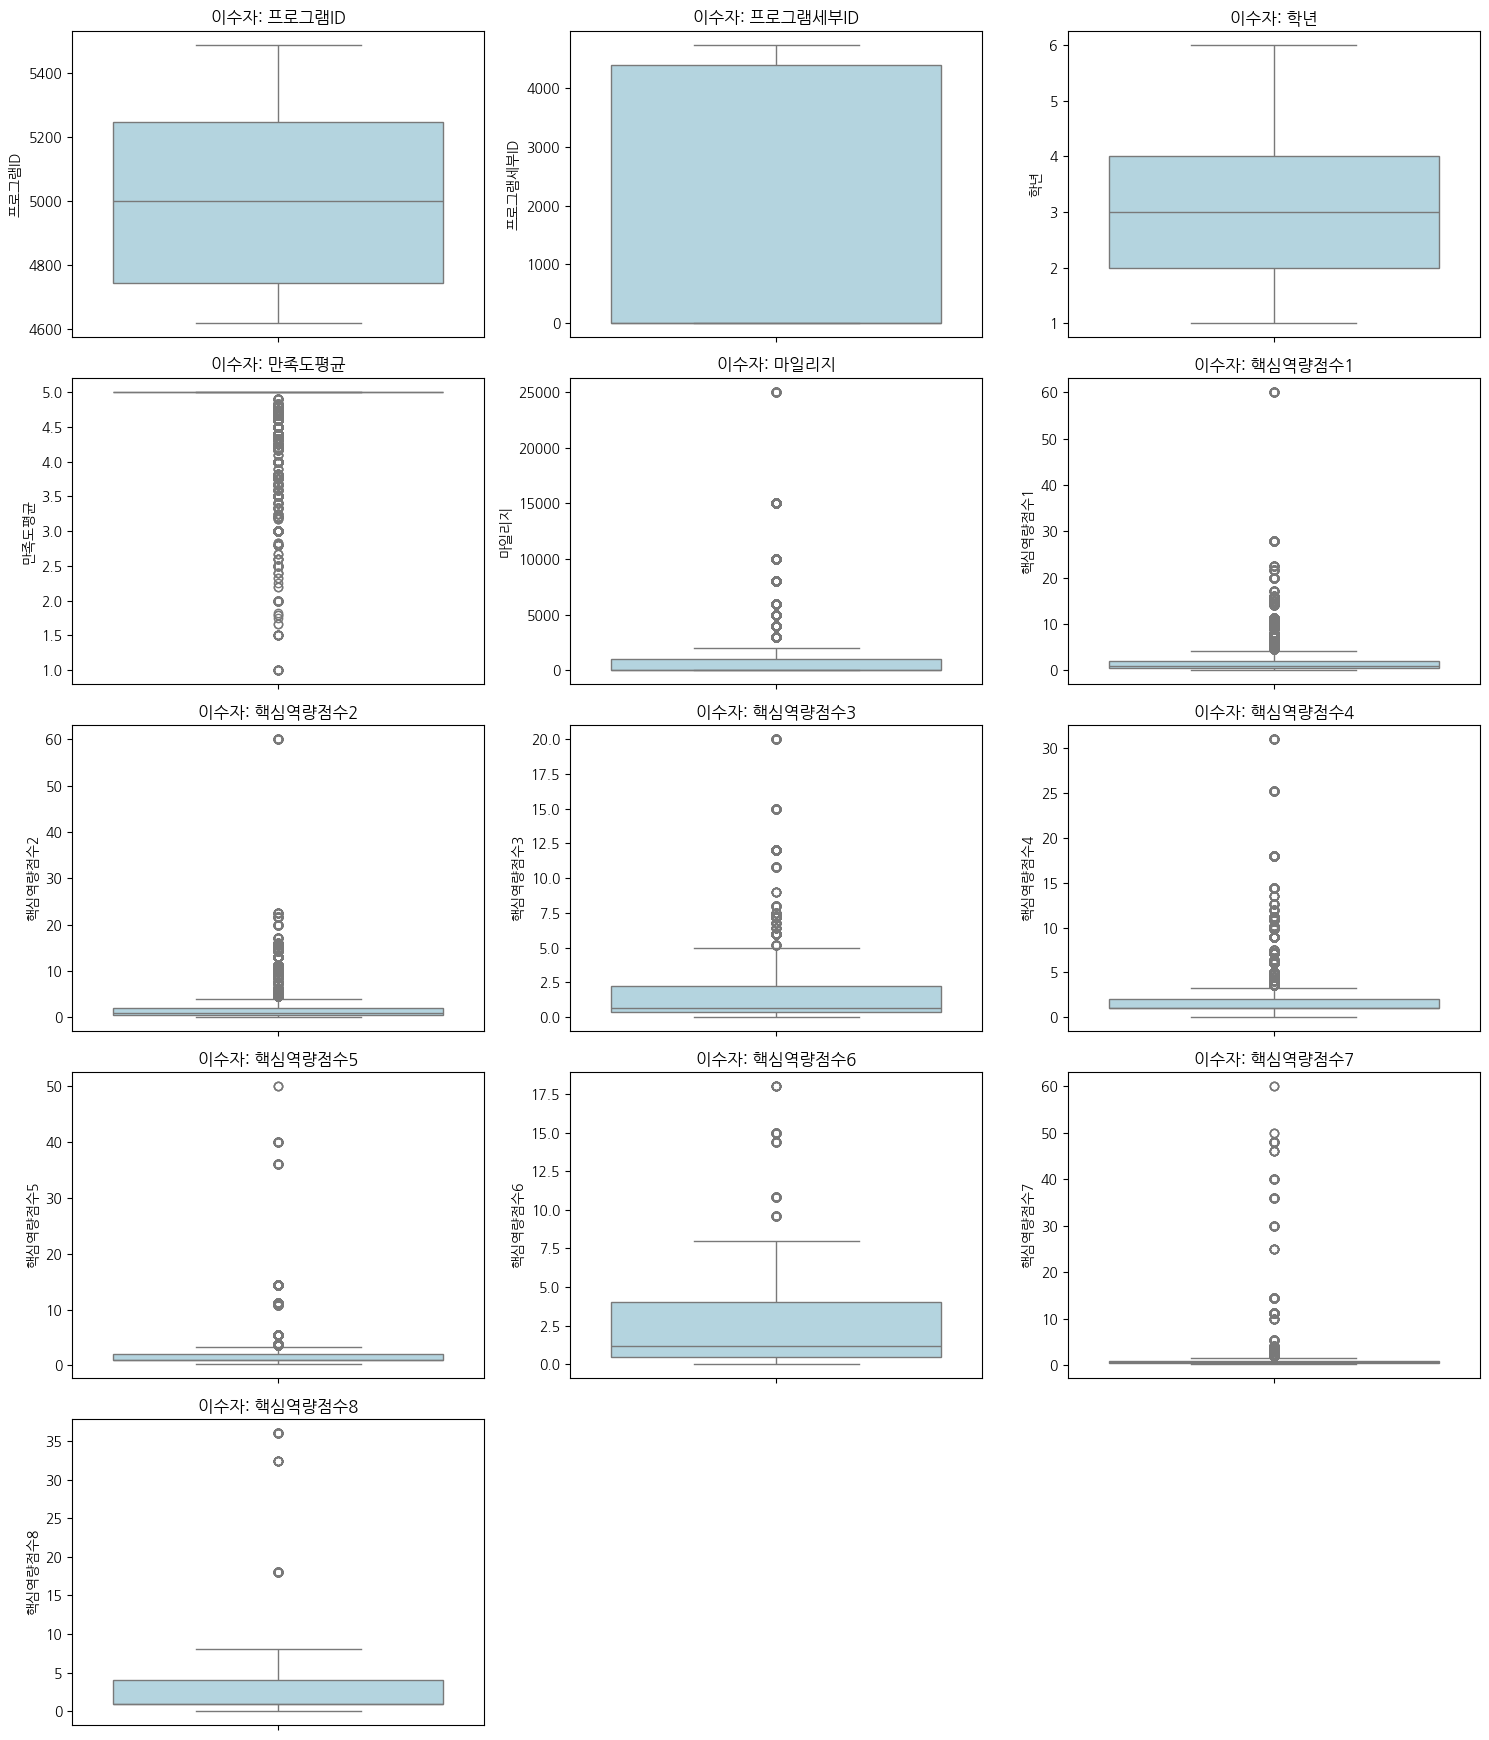

In [ ]:
# 값 범위 및 이상치
print("\n📊 [프로그램 정보] 수치형 변수 요약 (1%, 50%, 99%)")
display(program_df.describe(percentiles=[.01, .5, .99]).T)

print("\n📊 [이수자 정보] 수치형 변수 요약 (1%, 50%, 99%)")
display(student_df.describe(percentiles=[.01, .5, .99]).T)

# 이상치 시각화
num_cols_program = program_df.select_dtypes(include=['number']).columns
num_cols_student = student_df.select_dtypes(include=['number']).columns

def boxplot_each(df, cols, title_prefix):
    n = len(cols)
    ncols = 3
    nrows = (n // ncols) + 1
    plt.figure(figsize=(15, nrows * 3.5))
    for i, c in enumerate(cols):
        plt.subplot(nrows, ncols, i + 1)
        sns.boxplot(data=df, y=c, color="lightblue")
        plt.title(f"{title_prefix}: {c}")
        plt.tight_layout()
    plt.show()

print("\n📦 [프로그램 정보] 이상치 확인 (Boxplot)")
boxplot_each(program_df, num_cols_program, "프로그램")

print("\n📦 [이수자 정보] 이상치 확인 (Boxplot)")
boxplot_each(student_df, num_cols_student, "이수자")


⏰ [프로그램 정보] 시작일 연도별 분포


,count
시작일,
2024,859
2025,80


/tmp/ipython-input-3787997843.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col].dt.year, palette="Blues")


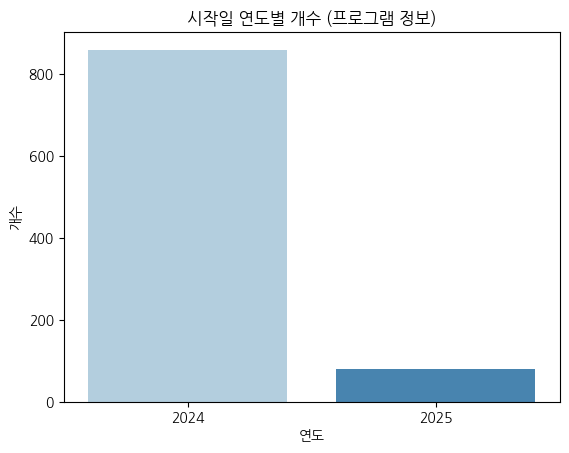


⏰ [프로그램 정보] 종료일 연도별 분포


,count
종료일,
2024,840
2025,99


/tmp/ipython-input-3787997843.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col].dt.year, palette="Blues")


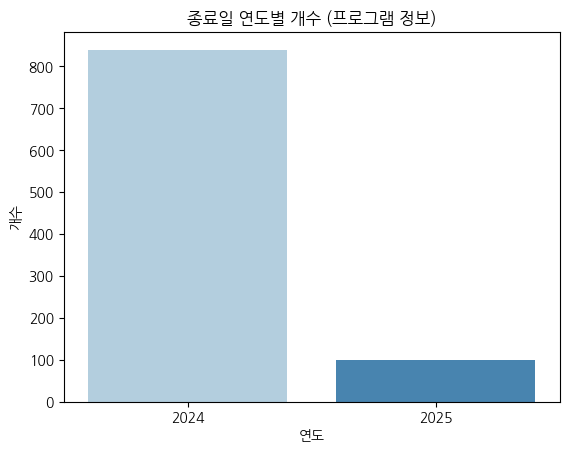

In [ ]:
# 날짜형 데이터
def date_distribution(df, date_cols, name):
    for col in date_cols:
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            print(f"\n⏰ [{name}] {col} 연도별 분포")
            display(df[col].dt.year.value_counts().sort_index())
            sns.countplot(x=df[col].dt.year, palette="Blues")
            plt.title(f"{col} 연도별 개수 ({name})")
            plt.xlabel("연도")
            plt.ylabel("개수")
            plt.show()

date_distribution(program_df, ['시작일','종료일'], "프로그램 정보")

# ✅ 다변량 탐색

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


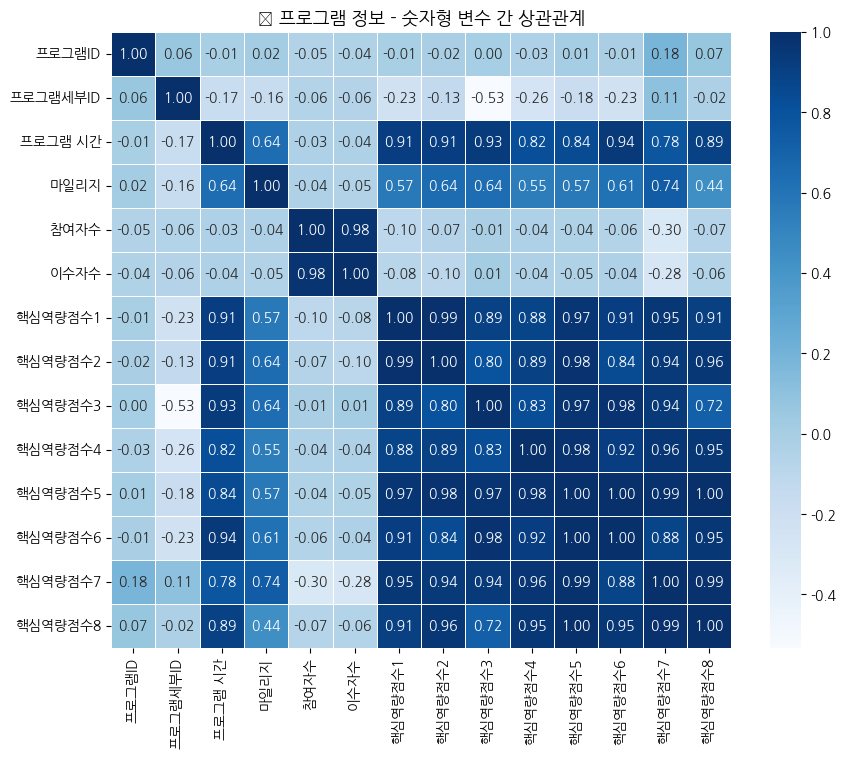

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


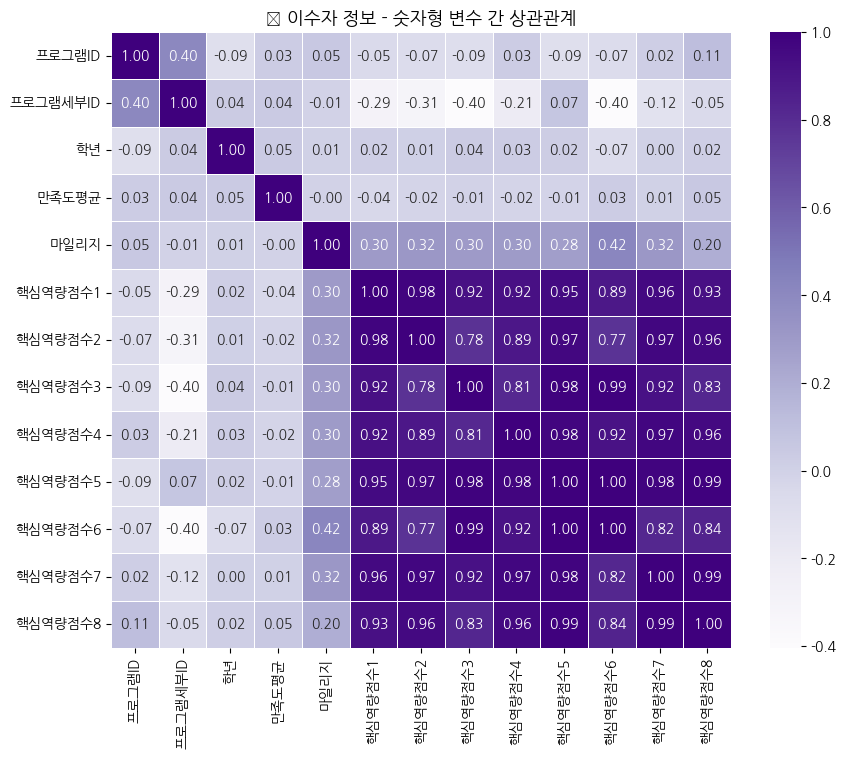

In [ ]:
# 숫자형 변수 간의 상관관계
num_cols_program = program_df.select_dtypes(include='number').columns
num_cols_student = student_df.select_dtypes(include='number').columns

corr_program = program_df[num_cols_program].corr()
corr_student = student_df[num_cols_student].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_program, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("📈 프로그램 정보 - 숫자형 변수 간 상관관계", fontsize=13)
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(corr_student, annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)
plt.title("📈 이수자 정보 - 숫자형 변수 간 상관관계", fontsize=13)
plt.show()


📊 프로그램 유형별 평균 참여자수 / 이수자수 / 마일리지


,참여자수,이수자수,마일리지
프로그램유형1,,,
기타,732.00,391.42,666.67
심리,134.41,95.68,3136.36
진로,93.79,73.72,1982.76
학습,71.08,42.57,3272.62
학생활동,63.75,60.62,2958.33
취업,58.21,39.78,2509.87
창업,36.06,20.25,1625.00


/tmp/ipython-input-264766851.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=program_df, x='프로그램유형1', y='참여자수', estimator='mean', ci=None, palette='Blues')
/tmp/ipython-input-264766851.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=program_df, x='프로그램유형1', y='참여자수', estimator='mean', ci=None, palette='Blues')


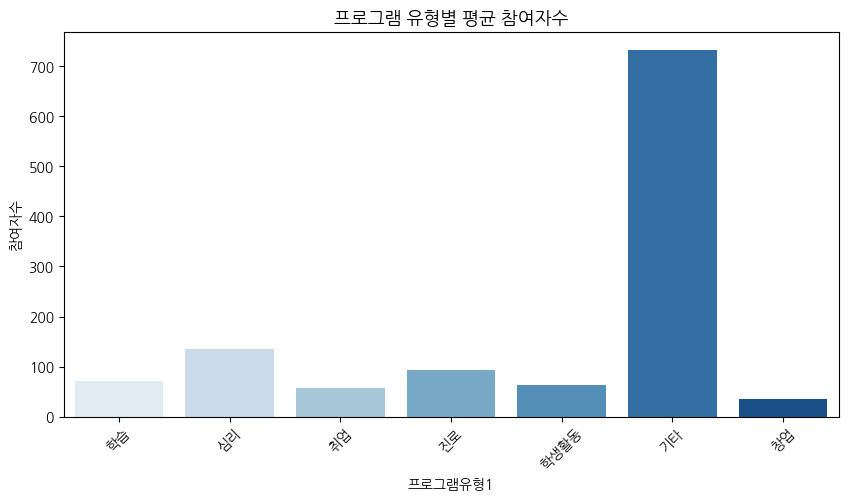

In [ ]:
# 프로그램 유형별 평균 참여자 수 / 이수자 수 / 마일리지
group_summary = (
    program_df.groupby('프로그램유형1')[['참여자수','이수자수','마일리지']]
    .mean()
    .sort_values(by='참여자수', ascending=False)
)
print("\n📊 프로그램 유형별 평균 참여자수 / 이수자수 / 마일리지")
display(group_summary.round(2))

plt.figure(figsize=(10,5))
sns.barplot(data=program_df, x='프로그램유형1', y='참여자수', estimator='mean', ci=None, palette='Blues')
plt.xticks(rotation=45)
plt.title("프로그램 유형별 평균 참여자수", fontsize=13)
plt.show()